In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
def change(x):
    if x=='..':
        return 0
    else:
        return x

In [2]:
l = [['Russia', '2018'],
['Brazil', '2014'],
['South Africa', '2010'],
['Germany', '2006'],
['Japan', '2002'],
['Korea', '2002'],
['France','1998'],
['United States','1994'],
['Italy', '1990'],
['Mexico', '1986'],
['Spain', '1982'],
['Argentina', '1978']]
l2 = [i[0] for i in l]
#### west germany 1974
#### england 1966
#### chili 1962
#### sweden 1958

In [3]:
full = pd.read_csv("full.csv")

In [4]:
a = []
for e,i in enumerate(full.columns):
    if e>5:
        a.append(i.split()[0])
    else:
        a.append(i)
full.columns = a

KeyError: "['Version Code'] not found in axis"

In [88]:
to_test = 'GDP (current US$)'

In [5]:
full2 = full[full['Country Name'].isin(l2)]
for column in full2.columns[3:]:
    full2[column]=full2[column].fillna(0).apply(lambda x:float(change(x)))
f= full2.drop('Version Name',axis=1).melt(id_vars=['Country Name','Series Name'])
f = f.set_index(['Country Name','Series Name','variable'],append=True)['value']
f = f.reset_index(drop=False)
f = f.drop('level_0',axis=1)
for column in f.columns[3:]:
    f[column]=f[column].fillna(0)
f = f.set_index('variable')
f = f.rename(index=str,columns={'Country Name':'Country','Series Name':'Variable','value':'Value'})

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
look_at = [i for i in f['Variable'].unique() if np.sum(f[f['Variable']==i]['Value'])!=0]
# these are variables worth looking at: variables that aren't totally blank

In [7]:
def years_f(to_test,f): #to_test is variable, f is dataframe
    ff = f[f['Variable']==to_test]

    wc = {}
    nwc = {}
    for country in l:
        ##-------iterate through each country------------------------------------------------------
        testing = ff[ff['Country']==country[0]]
        others = ff[ff['Country']!=country[0]]
        for year in range(-4,5):
            #print(testing.tail(20))
            ## #--------iterate through each year-------------------------------------
            if int(country[1])+year <2020 and int(country[1])+year >1970:
                cval = testing.loc[str(int(country[1])+year)].Value
                try:    
                    if cval !=0:
                        wc[str(year)][0]+=cval
                        wc[str(year)][1]+=1
                except:
                    if cval !=0:
                        wc[str(year)]=[cval,1]
                adding = [i for i in others.loc[str(int(country[1])+year)]['Value'] if i !=0]
                try:
                    nwc[str(year)][0]+=np.sum(adding)
                    nwc[str(year)][1]+=len(adding)
                except:
                    nwc[str(year)]=[np.sum(adding),len(adding)]
#----------------------------------------------------------------------                    
    a={}
    for key,value in wc.items():
        a[key]=float(value[0])/value[1]
    wc=a
    a={}
    for key,value in nwc.items():
        a[key]=float(value[0])/value[1]
    nwc=a
#----------------------------------------------------------------------
    n = pd.DataFrame(nwc,index=range(1)).melt()
    y = pd.DataFrame(wc,index=range(1)).melt()
    n['variable']=[int(i) for i in n['variable']]
    y['variable']=[int(i) for i in y['variable']]
    n['Cup Year']=['No' for i in range(len(n))]
    y['Cup Year']=['Yes' for i in range(len(n))]
    b = n.append(y)
#----------------------------------------------------------------------
    g = sb.factorplot(x='variable',y='value',hue='Cup Year',data=b)
    for i in g.axes[0]:
        i.set_xlabel('Years before/after World Cup')
        i.set_ylabel(to_test.split()[0])
        i.set_title(to_test+' over Time')
        i.axvline(4,lw=1,c='r',ls='--',zorder=100)
    plt.show()
    g = sb.catplot(x='variable',y='value',col='Cup Year',data=b,kind='bar',color='grey')
    for i in g.axes[0]:
        i.get_children()[4].set_color('r')
        i.set_xlabel('Years before/after World Cup')
        i.set_ylabel(to_test.split()[0])
        i.set_title(to_test+' over Time')
    plt.show()

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


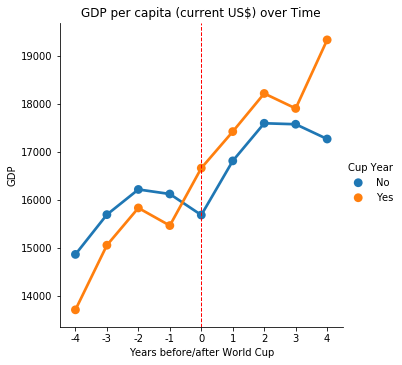

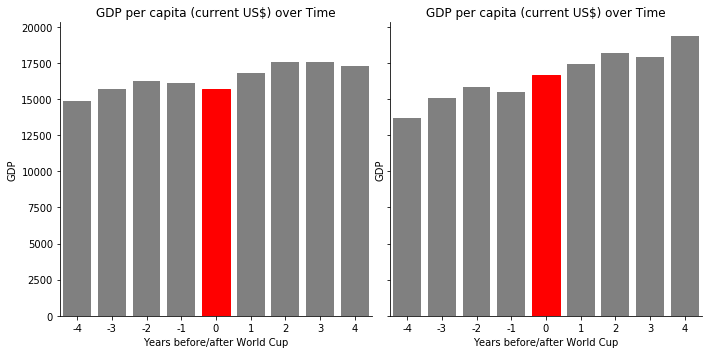

In [8]:
years_f('GDP per capita (current US$)',f)

In [50]:
look_at

['2005 PPP conversion factor, GDP (LCU per international $)',
 'Agriculture, value added (% of GDP)',
 'Claims on central government, etc. (% GDP)',
 'Claims on other sectors of the domestic economy (% of GDP)',
 'CO2 emissions (kg per 2010 US$ of GDP)',
 'CO2 emissions (kg per 2011 PPP $ of GDP)',
 'CO2 emissions (kg per PPP $ of GDP)',
 'Coal rents (% of GDP)',
 'Current health expenditure (% of GDP)',
 'Discrepancy in expenditure estimate of GDP (constant LCU)',
 'Discrepancy in expenditure estimate of GDP (current LCU)',
 'Domestic credit provided by financial sector (% of GDP)',
 'Domestic credit to private sector (% of GDP)',
 'Domestic credit to private sector by banks (% of GDP)',
 'Domestic general government health expenditure (% of GDP)',
 'Energy intensity level of primary energy (MJ/$2011 PPP GDP)',
 'Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)',
 'Expense (% of GDP)',
 'Exports of goods and services (% of GDP)',
 'External balance on goods and ser

In [ ]:
def years(to_test):
    wc = {}
    nwc = {}
    full2 = full[full['Country Name'].isin(l2)]
    for column in full2.columns[3:]:
        full2[column]=full2[column].fillna(0).apply(lambda x:float(change(x)))
    for country in l:
        f = full2[full2['Country Name']==country[0]]
        r = full2[full2['Country Name']!=country[0]]
        f= f.drop('Version Name',axis=1).melt(id_vars=['Country Name','Series Name'])
        #f = f.drop_duplicates(subset = 'Series Name')
        f = f.set_index(['Country Name','Series Name','variable'],append=True)['value']
        f = f.unstack('Series Name').reset_index(drop=False)
        f = f.drop('level_0',axis=1)
        for column in f.columns[3:]:
            f[column]=f[column].fillna(0)
        f = f.set_index('variable')
        for year in range(-4,4):
            try:
                try:
                    wc[str(country[0])+str(year)]+=f.loc[country[1]+year].to_test
                except:
                    wc[str(country[0])+str(year)]=f.loc[country[1]+year].to_test
            except:
                pass
            for other_countries in l2:
                if other_countries!=country[0]:
                    try:
                        try:
                            nwc[str(year)]+=f.loc[country[1]+year].to_test
                        except:
                            nwc[str(year)]=f.loc[country[1]+year].to_test
                    except:
                        pass
    return wc,nwc

In [22]:
def cplot(country,variable,year):
    a = f[f['Country']==country]
    a_s = a.drop(['Country Code','Indicator Code'],axis=1)
    a_s = a_s.melt(id_vars=['Country Name','Indicator Name'])
    a_s = a_s.set_index(['Country Name','Indicator Name','variable'])['value']
    a_s = a_s.unstack('Indicator Name').reset_index()
    a_s = a_s.dropna(axis=1,how='all')
    f,ax = plt.subplots(1,1,figsize=(16,4))
    #print(a_s['Central government debt, total (% of GDP)'][:10])
    a_s[variable]= a_s[variable].fillna(0)
    #print0(a_s['variable'])
    plt.plot(a_s['variable'],a_s[variable])
    
    plt.title(country)
    plt.xticks(rotation=45)
    ax.axvline(str(year),color='r',ls='--',lw=1)
    plt.show()